# Sales of retail stores

## Steps to be followed
1. Data collection
2. Importing libraries
3. Importing datasets
4. Preprocessing
5. Identifying and handling missing values
6. Visualization
7. Encoding categorical features to numerical
8. Splitting the data
9. Scaling
10. Model building
11. model performance

## 1. Dataset collected from team lead

## 2. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

## 3. Importing datasets

In [2]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('C:/Users/Reddymr2022/Reddappa_4431-Internship/Week-6-Presentation/Sales_of_retail_store.zip') # having First.csv zipped file.
Sales1 = pd.read_csv(zf.open('Sales of retail store/date_to_week_id_map.csv'))
Sales2 = pd.read_csv(zf.open('Sales of retail store/product_prices.csv'))
Sales3 = pd.read_csv(zf.open('Sales of retail store/train_data.csv'))
Sales4 = pd.read_csv(zf.open('Sales of retail store/test_data.csv'))

In [3]:
print(Sales1.shape)
print(Sales2.shape)
print(Sales3.shape)
print(Sales4.shape)

(821, 2)
(59000, 4)
(395000, 7)
(15500, 7)


## 4. Preprocessing

In [4]:
Sales1.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [5]:
Sales2.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [6]:
Sales3.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [7]:
Sales4.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


In [8]:
df = pd.merge(Sales1, Sales2, on=['week_id'])

In [9]:
df = pd.merge(df, Sales3)

In [10]:
df.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0


In [11]:
df['sales'].nunique()

126

In [12]:
df['sales'].value_counts()

0      246622
1       63068
2       31179
3       17115
4       10575
        ...  
174         1
124         1
119         1
85          1
89          1
Name: sales, Length: 126, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   week_id                395000 non-null  int64  
 2   outlet                 395000 non-null  int64  
 3   product_identifier     395000 non-null  int64  
 4   sell_price             395000 non-null  float64
 5   department_identifier  395000 non-null  int64  
 6   category_of_product    395000 non-null  object 
 7   state                  395000 non-null  object 
 8   sales                  395000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB


In [14]:
df.shape

(395000, 9)

## 5. Identifying and handling missing values

In [15]:
df.isna().sum()

date                     0
week_id                  0
outlet                   0
product_identifier       0
sell_price               0
department_identifier    0
category_of_product      0
state                    0
sales                    0
dtype: int64

In [16]:
df.describe()

,week_id,outlet,product_identifier,sell_price,department_identifier,sales
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,105.070886,211.200000,1509.960000,4.987644,24.460000,1.228919
std,32.578749,91.161291,809.799518,3.874444,6.337863,3.595266
min,49.000000,111.000000,74.000000,0.050000,11.000000,0.000000
25%,77.000000,113.000000,926.000000,2.680000,21.000000,0.000000
50%,105.000000,221.500000,1325.000000,3.980000,22.000000,0.000000
75%,133.000000,331.000000,1753.000000,6.480000,31.000000,1.000000
max,161.000000,333.000000,3021.000000,44.360000,33.000000,293.000000


<AxesSubplot:>

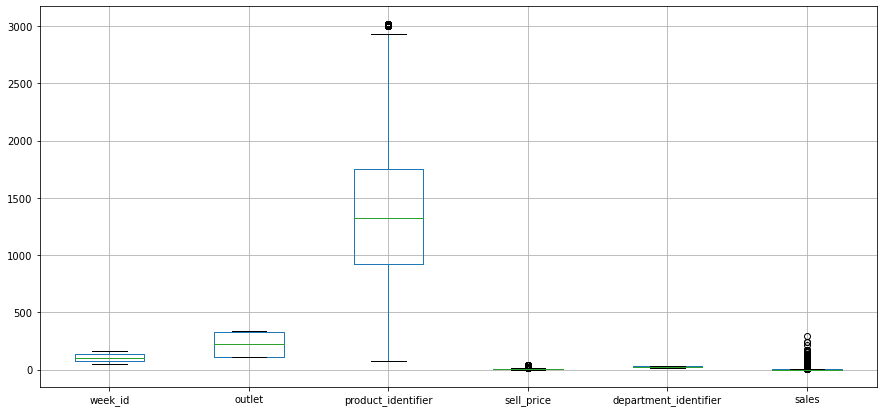

In [17]:
#boxplot to check the outliers
plt.figure(figsize = (15, 7)) 
df.boxplot()

<AxesSubplot:xlabel='product_identifier', ylabel='Density'>

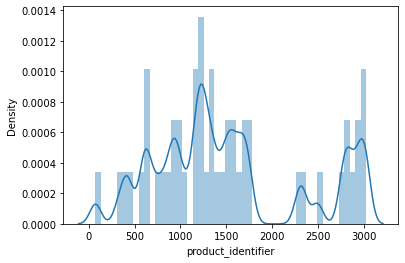

In [18]:
#Need to handle with outliers
sns.distplot(df['product_identifier'])

In [19]:
## calculating inter quantile range
Q3 = df.product_identifier.quantile(0.75)
Q1 = df.product_identifier.quantile(0.25)
IQR = Q3 - Q1
IQR

827.0

In [20]:
#Outlier 
lower_bridge = df['product_identifier'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['product_identifier'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-314.5
2993.5


In [21]:
# filling outlier with fixed value
df.loc[df['product_identifier']>=2993, 'product_identifier']=2993

<AxesSubplot:xlabel='product_identifier', ylabel='Density'>

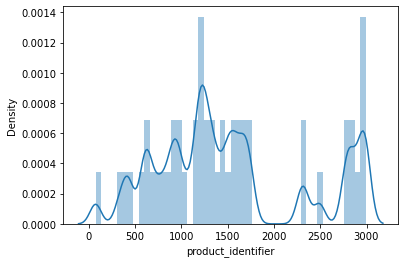

In [22]:
#Need to handle with outliers
sns.distplot(df['product_identifier'])

<AxesSubplot:xlabel='sell_price', ylabel='Density'>

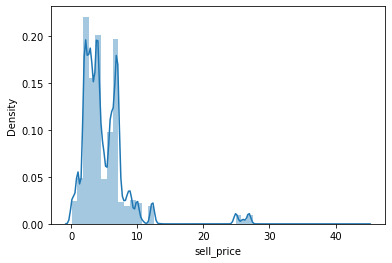

In [23]:
#Need to handle with outliers
sns.distplot(df['sell_price'])

In [24]:
## calculating inter quantile range
Q3 = df.sell_price.quantile(0.75)
Q1 = df.sell_price.quantile(0.25)
IQR = Q3 - Q1
IQR

3.8000000000000003

In [25]:
#Outlier 
lower_bridge = df['sell_price'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['sell_price'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-3.02
12.18


In [26]:
# filling outlier with fixed value
df.loc[df['sell_price']>=12, 'sell_price']=12

<AxesSubplot:xlabel='sell_price', ylabel='Density'>

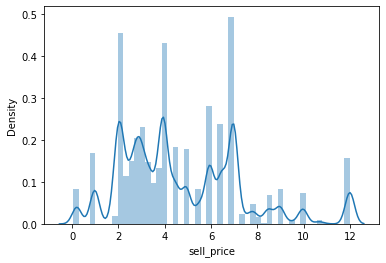

In [27]:
#Need to handle with outliers
sns.distplot(df['sell_price'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

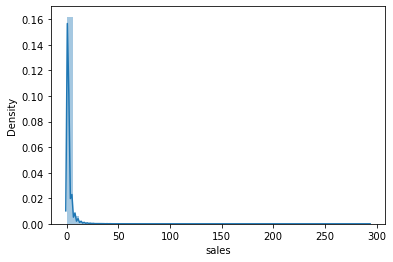

In [28]:
#Need to handle with outliers
sns.distplot(df['sales'])

In [29]:
## calculating inter quantile range
Q3 = df.sales.quantile(0.75)
Q1 = df.sales.quantile(0.25)
IQR = Q3 - Q1
IQR

1.0

In [30]:
#Outlier 
lower_bridge = df['sales'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['sales'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1.5
2.5


In [31]:
# filling outlier with fixed value
df.loc[df['sales']>=3, 'sales']=3

<AxesSubplot:xlabel='sales', ylabel='Density'>

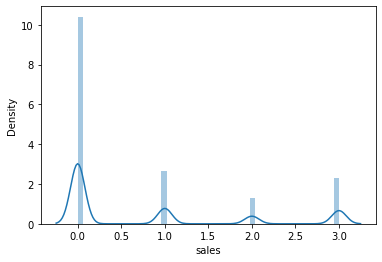

In [32]:
#Need to handle with outliers
sns.distplot(df['sales'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   week_id                395000 non-null  int64  
 2   outlet                 395000 non-null  int64  
 3   product_identifier     395000 non-null  int64  
 4   sell_price             395000 non-null  float64
 5   department_identifier  395000 non-null  int64  
 6   category_of_product    395000 non-null  object 
 7   state                  395000 non-null  object 
 8   sales                  395000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB


In [34]:
# Convert the column to datetime
df['date'] = pd.to_datetime(df['date'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   395000 non-null  datetime64[ns]
 1   week_id                395000 non-null  int64         
 2   outlet                 395000 non-null  int64         
 3   product_identifier     395000 non-null  int64         
 4   sell_price             395000 non-null  float64       
 5   department_identifier  395000 non-null  int64         
 6   category_of_product    395000 non-null  object        
 7   state                  395000 non-null  object        
 8   sales                  395000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 30.1+ MB


In [36]:
df.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0


In [37]:
df = df.drop(['date'],axis=1)

## 6. Visualization

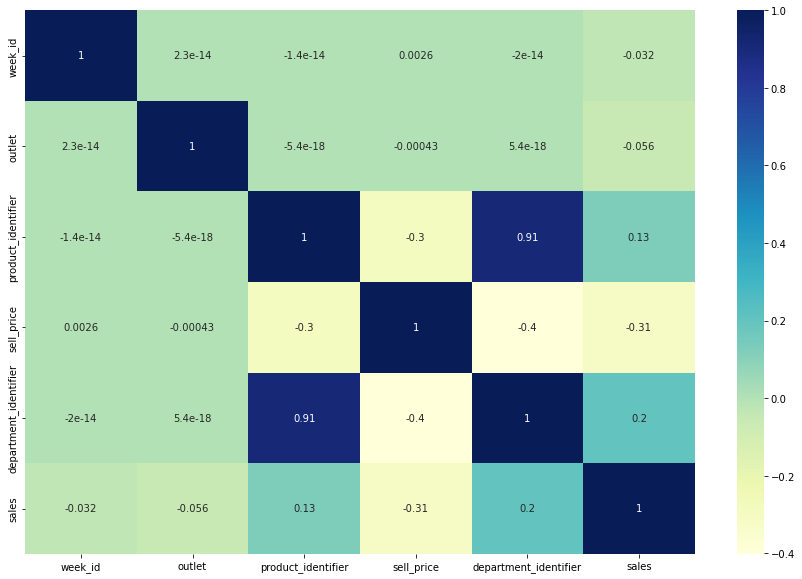

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='week_id', ylabel='Density'>

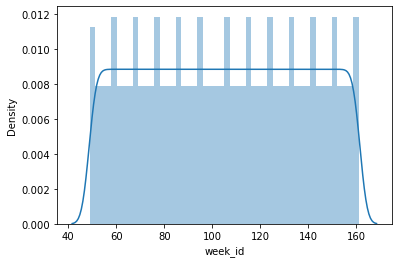

In [39]:
#Need to handle with outliers
sns.distplot(df['week_id'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

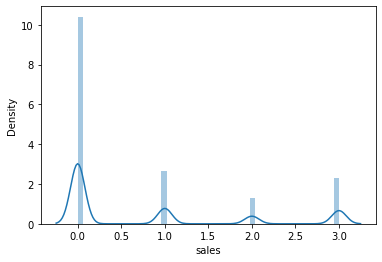

In [40]:
#Need to handle with outliers
sns.distplot(df['sales'])

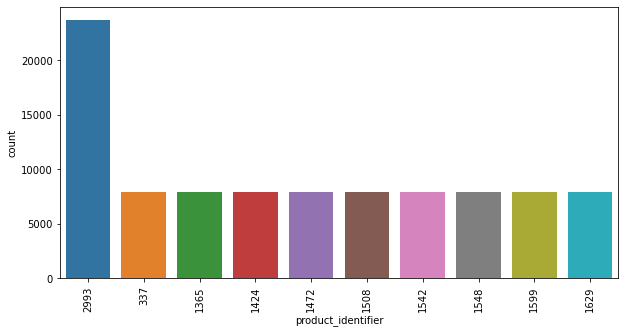

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='product_identifier',data=df, ax = ax, order = df['product_identifier'].value_counts().iloc[:10].index)

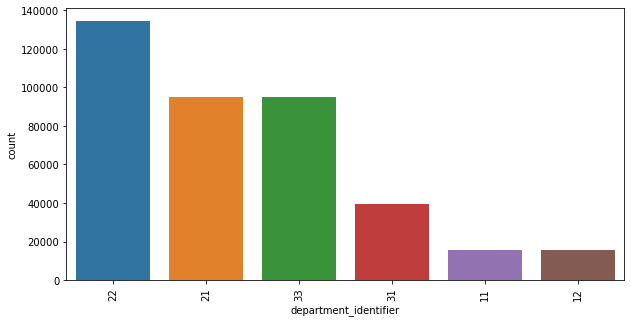

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='department_identifier',data=df, ax = ax, order = df['department_identifier'].value_counts().iloc[:20].index)

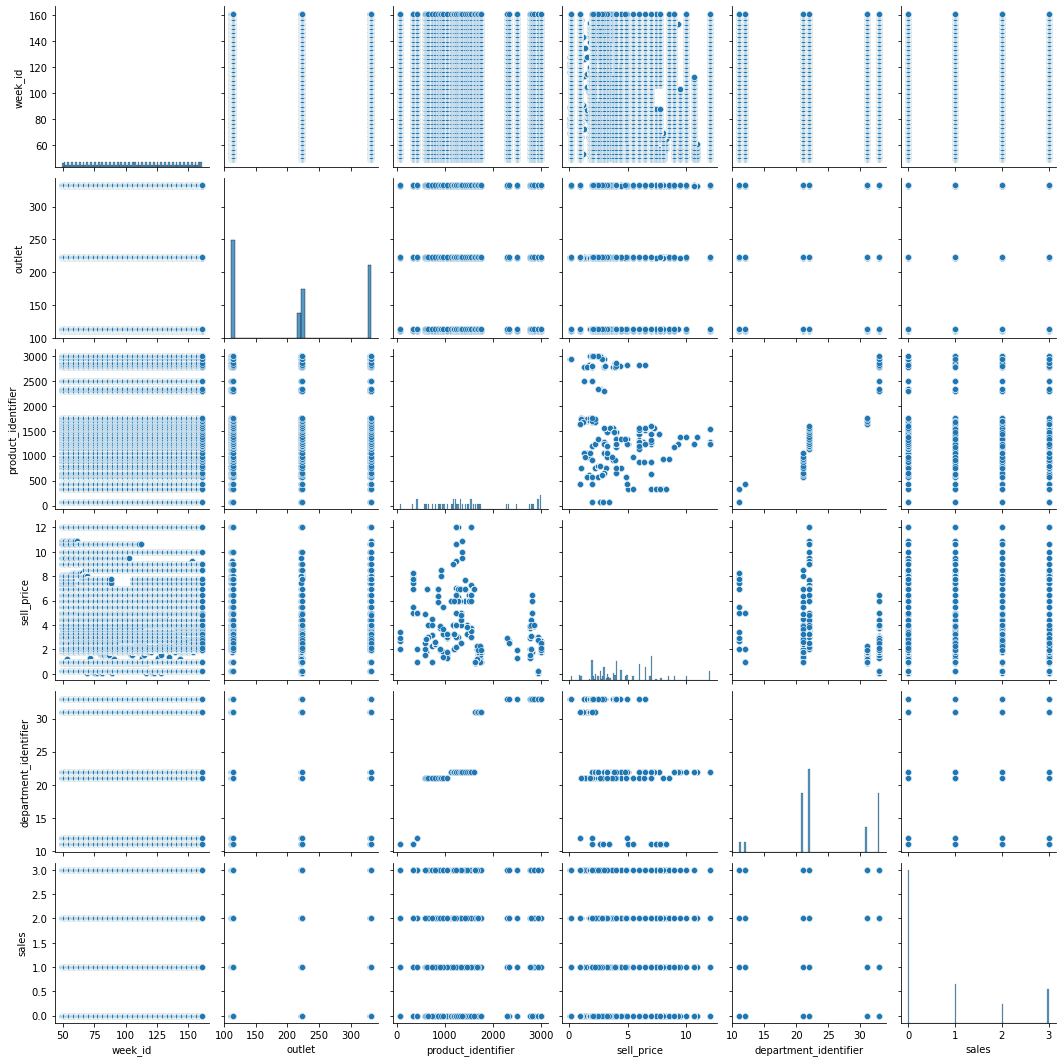

In [43]:
sns.pairplot(df)

In [44]:
df.head()

,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales
0,49,111,74,2.94,11,others,Maharashtra,0
1,49,111,337,7.44,11,others,Maharashtra,1
2,49,111,423,0.97,12,others,Maharashtra,0
3,49,111,432,4.97,12,others,Maharashtra,0
4,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0


In [45]:
df = df.drop(['product_identifier'],axis=1)

In [46]:
df.head()

,week_id,outlet,sell_price,department_identifier,category_of_product,state,sales
0,49,111,2.94,11,others,Maharashtra,0
1,49,111,7.44,11,others,Maharashtra,1
2,49,111,0.97,12,others,Maharashtra,0
3,49,111,4.97,12,others,Maharashtra,0
4,49,111,4.88,21,fast_moving_consumer_goods,Maharashtra,0


In [47]:
df['state'].nunique()

3

In [48]:
df['category_of_product'].nunique()

3

## 7. Encoding from categorical features to numerical

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
df['category_of_product'] = le.fit_transform(df['category_of_product'])
df['state'] = le.fit_transform(df['state'])

In [51]:
df.head()

,week_id,outlet,sell_price,department_identifier,category_of_product,state,sales
0,49,111,2.94,11,2,1,0
1,49,111,7.44,11,2,1,1
2,49,111,0.97,12,2,1,0
3,49,111,4.97,12,2,1,0
4,49,111,4.88,21,1,1,0


In [52]:
df.tail()

,week_id,outlet,sell_price,department_identifier,category_of_product,state,sales
394995,161,333,2.78,33,0,0,2
394996,161,333,0.20,33,0,0,3
394997,161,333,2.50,33,0,0,0
394998,161,333,1.98,33,0,0,0
394999,161,333,2.08,33,0,0,0


In [53]:
# seperating the dependent and independent variables
X = df.drop("sell_price", axis = 1)
y = df["sell_price"]

## 8. Splitting the data

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 9. Feature scaling

In [55]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [56]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

## 10. Model building

In [57]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
sk_model = Lasso(alpha=0.01)

In [58]:
model = LinearRegression()

In [59]:
model = model.fit(X_train, y_train)

In [60]:
model.score(X_train, y_train)*100

23.691189324408725

In [61]:
y_pred_lr = model.predict(X_test)

In [62]:
sk_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [63]:
sk_model.score(X_train, y_train)*100

23.182390500947992

In [64]:
y_pred = sk_model.predict(X_test)

## 11. Model performance

In [65]:
from sklearn import metrics
print('Linear_Regression')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred_lr)*100))
score = metrics.r2_score(y_test,y_pred_lr)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_lr)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))

Linear_Regression
r2_score 23.58
Adjusted_r2_score 23.57
MAE: 1.72
RMSE: 2.31


In [66]:
from sklearn import metrics
print('Linear_Regression')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred)*100))
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Linear_Regression
r2_score 23.04
Adjusted_r2_score 23.04
MAE: 1.75
RMSE: 2.32


# Reddappa M R